<a href="https://colab.research.google.com/github/88FaHaD/ML/blob/main/cnnprac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
!wget  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-02-20 17:28:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 74.125.134.207, 74.125.139.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  85.8MB/s    in 1.2s    

2024-02-20 17:28:54 (85.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
zip_ref=zipfile.ZipFile('pizza_steak.zip')

In [3]:
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/test/

pizza  steak


In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:

# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [9]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


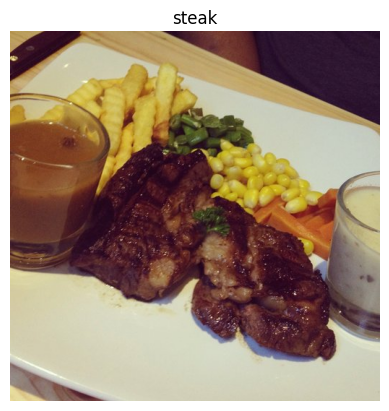

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

array([[[180, 147,  78],
        [182, 149,  80],
        [185, 152,  83],
        ...,
        [ 41,  18,  44],
        [ 41,  18,  44],
        [ 41,  18,  44]],

       [[178, 145,  76],
        [178, 145,  76],
        [180, 147,  78],
        ...,
        [ 42,  19,  45],
        [ 42,  19,  45],
        [ 42,  19,  45]],

       [[180, 147,  78],
        [179, 146,  77],
        [177, 144,  75],
        ...,
        [ 40,  17,  43],
        [ 41,  18,  44],
        [ 41,  18,  44]],

       ...,

       [[234, 218, 156],
        [232, 216, 154],
        [229, 215, 152],
        ...,
        [204, 202, 179],
        [204, 202, 179],
        [205, 203, 180]],

       [[234, 218, 156],
        [233, 217, 155],
        [233, 217, 155],
        ...,
        [203, 201, 178],
        [203, 201, 178],
        [203, 201, 178]],

       [[234, 218, 156],
        [235, 219, 157],
        [235, 219, 157],
        ...,
        [203, 201, 178],
        [202, 200, 177],
        [202, 200, 177]]], dtype=uint8)
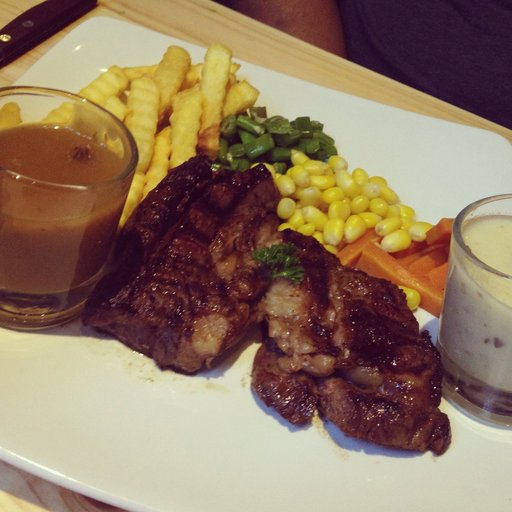

In [11]:
# View the img (actually just a big array/tensor)
img

In [12]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

In [13]:
img/255

array([[[0.70588235, 0.57647059, 0.30588235],
        [0.71372549, 0.58431373, 0.31372549],
        [0.7254902 , 0.59607843, 0.3254902 ],
        ...,
        [0.16078431, 0.07058824, 0.17254902],
        [0.16078431, 0.07058824, 0.17254902],
        [0.16078431, 0.07058824, 0.17254902]],

       [[0.69803922, 0.56862745, 0.29803922],
        [0.69803922, 0.56862745, 0.29803922],
        [0.70588235, 0.57647059, 0.30588235],
        ...,
        [0.16470588, 0.0745098 , 0.17647059],
        [0.16470588, 0.0745098 , 0.17647059],
        [0.16470588, 0.0745098 , 0.17647059]],

       [[0.70588235, 0.57647059, 0.30588235],
        [0.70196078, 0.57254902, 0.30196078],
        [0.69411765, 0.56470588, 0.29411765],
        ...,
        [0.15686275, 0.06666667, 0.16862745],
        [0.16078431, 0.07058824, 0.17254902],
        [0.16078431, 0.07058824, 0.17254902]],

       ...,

       [[0.91764706, 0.85490196, 0.61176471],
        [0.90980392, 0.84705882, 0.60392157],
        [0.89803922, 0

In [14]:
import tensorflow as tf
tf_img=tf.constant(img)

In [15]:
tf_img

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[180, 147,  78],
        [182, 149,  80],
        [185, 152,  83],
        ...,
        [ 41,  18,  44],
        [ 41,  18,  44],
        [ 41,  18,  44]],

       [[178, 145,  76],
        [178, 145,  76],
        [180, 147,  78],
        ...,
        [ 42,  19,  45],
        [ 42,  19,  45],
        [ 42,  19,  45]],

       [[180, 147,  78],
        [179, 146,  77],
        [177, 144,  75],
        ...,
        [ 40,  17,  43],
        [ 41,  18,  44],
        [ 41,  18,  44]],

       ...,

       [[234, 218, 156],
        [232, 216, 154],
        [229, 215, 152],
        ...,
        [204, 202, 179],
        [204, 202, 179],
        [205, 203, 180]],

       [[234, 218, 156],
        [233, 217, 155],
        [233, 217, 155],
        ...,
        [203, 201, 178],
        [203, 201, 178],
        [203, 201, 178]],

       [[234, 218, 156],
        [235, 219, 157],
        [235, 219, 157],
        ...,
        [203, 201, 17

In [16]:
tf_img_norm=tf_img/255

In [17]:
tf_img_norm

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.7058824 , 0.5764706 , 0.30588236],
        [0.7137255 , 0.58431375, 0.3137255 ],
        [0.7254902 , 0.59607846, 0.3254902 ],
        ...,
        [0.16078432, 0.07058824, 0.17254902],
        [0.16078432, 0.07058824, 0.17254902],
        [0.16078432, 0.07058824, 0.17254902]],

       [[0.69803923, 0.5686275 , 0.29803923],
        [0.69803923, 0.5686275 , 0.29803923],
        [0.7058824 , 0.5764706 , 0.30588236],
        ...,
        [0.16470589, 0.07450981, 0.1764706 ],
        [0.16470589, 0.07450981, 0.1764706 ],
        [0.16470589, 0.07450981, 0.1764706 ]],

       [[0.7058824 , 0.5764706 , 0.30588236],
        [0.7019608 , 0.57254905, 0.3019608 ],
        [0.69411767, 0.5647059 , 0.29411766],
        ...,
        [0.15686275, 0.06666667, 0.16862746],
        [0.16078432, 0.07058824, 0.17254902],
        [0.16078432, 0.07058824, 0.17254902]],

       ...,

       [[0.91764706, 0.85490197, 0.6117647 ],
        [0.90

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# Normalizing the data
train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen= ImageDataGenerator(rescale=1./255)

In [20]:
#crating the paths for datasets
train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

In [ ]:
#converting the data into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)
valid_data=valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode='binary',
    seed=42
)

model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,  # Corrected argument name
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),  # Corrected spelling of 'layers'
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),  # Corrected spelling of 'layers' and 'pool_size'
    tf.keras.layers.Conv2D(10, 3, activation='relu'),  # Corrected spelling of 'layers'
    tf.keras.layers.Conv2D(10, 3, activation='relu'),  # Corrected spelling of 'layers'
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),  # Corrected spelling of 'layers' and 'pool_size'
    tf.keras.layers.Flatten(),  # Flatten layer added
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

history1=model1.fit(train_data,epochs=5,verbose=0,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model1.summary()

In [ ]:
model1.evaluate(valid_data)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
history1_pd=pd.DataFrame(history1.history)
history1_pd.plot()
plt.title('Cnn model')
plt.show()


In [ ]:
#ploting random images
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image('/content/pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img=view_random_image('/content/pizza_steak/train/','pizza')

# Preprocessing the data

In [ ]:
# Giving the dataset directories
train_data='/content/pizza_steak/train'
test_data='/content/pizza_steak/test'

Turning the data to batches

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

In [ ]:
train_data = train_datagen.flow_from_directory('/content/pizza_steak/train', target_size=(224, 224), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory('/content/pizza_steak/test', target_size=(224, 224), batch_size=32, class_mode='binary')

In [ ]:
images,labels=train_data.next()
len(images),len(labels)

In [ ]:
len(train_data)

In [ ]:
# Create a Cnn model

In [ ]:
model3=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ])



In [ ]:
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )


In [ ]:

# Then, you can pass them to the fit() function
history3 = model3.fit(train_data, epochs=5, verbose=0, steps_per_epoch=len(train_data),
                      validation_data=(test_data), validation_steps=len(test_data))

In [ ]:
import pandas as pd
history3_pd=pd.DataFrame(history3.history)
history3_pd.plot()
plt.title('model 3')
plt.show

In [ ]:
model3.evaluate(test_data)

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history3.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
plot_loss_curves(history3)

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                        rotation_range=0.2,
                                        sheer_range=0.2,
                                        zoom_range=0.2,
                                        height_shift_range=0.2,
                                        width_shift_range=0.2)

train_datagen=ImageDataGenerator(rescale=1/255.)
teat_datagen_augmented=ImageDataGenerator(1/255.)

In [ ]:
#creating augmented data
train_augdata=train_Datagen_augmented.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)
#creating non augmented data
train_data=train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)

#creating non augmented test data
test_data=train_Datagen_augmented.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)

